In [1]:
from preamble import *
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# cancerデータ
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# 訓練値の最大値最小値を計算
scaler = MinMaxScaler().fit(X_train)

In [9]:
# 訓練データをスケール変換
X_train_scaled = scaler.transform(X_train)

# SVM
svm = SVC()
# SVMをスケール変換したデータで訓練
svm.fit(X_train_scaled, y_train)
# テストデータをスケール変換し、評価
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.95


C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
print(X_train)
print(scaler.min_)
print(X_train_scaled)

[[ 11.85   17.46   75.54  ...   0.091   0.31    0.07 ]
 [ 11.22   19.86   71.94  ...   0.02    0.329   0.065]
 [ 20.13   28.25  131.2   ...   0.163   0.257   0.066]
 ...
 [  9.436  18.32   59.82  ...   0.051   0.245   0.081]
 [  9.72   18.22   60.73  ...   0.      0.191   0.066]
 [ 11.51   23.93   74.52  ...   0.097   0.211   0.087]]
[-0.33  -0.403 -0.303 -0.061 -0.572 -0.066  0.     0.    -0.535 -1.052
 -0.04  -0.08  -0.036 -0.014 -0.079 -0.022  0.     0.    -0.147 -0.031
 -0.282 -0.32  -0.251 -0.046 -0.47  -0.026  0.     0.    -0.308 -0.361]
[[0.23  0.322 0.219 ... 0.315 0.303 0.099]
 [0.201 0.421 0.195 ... 0.07  0.34  0.067]
 [0.622 0.769 0.604 ... 0.561 0.199 0.074]
 ...
 [0.116 0.357 0.111 ... 0.174 0.175 0.173]
 [0.13  0.353 0.117 ... 0.    0.068 0.069]
 [0.214 0.59  0.212 ... 0.333 0.108 0.212]]


### 6.1 前処理を行う際のパラメータ選択

In [17]:
# グリッドサーチ
from sklearn.model_selection import GridSearchCV
# 説明用。NGコード。
param_gird = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_gird, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test_scaled, y_test)))

Best cross-validation accuracy: 0.98
Best parameters:  {'C': 1, 'gamma': 1}
Test set accuracy: 0.97


### 6.2 パイプラインの構築

In [18]:
""" ①MinMaxScalerでのスケール変換
    ②SVMを訓練 """
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [19]:
pipe.fit(X_train, y_train)

C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [20]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.95


### 6.3 パイプラインを用いたグリッドサーチ

In [21]:
## __は意味あり。
param_gird = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [23]:
grid = GridSearchCV(pipe, param_grid=param_gird, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


### 6.4汎用パイプラインインターフェース

In [24]:
# make_pipeline
from sklearn.pipeline import make_pipeline
# 標準の文法
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
# 短縮ver
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [25]:
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


In [27]:
# GridSearchCV内のパイプラインの属性へのアクセス
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# パイプライン作成
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [28]:
# パラメータグリッド作成
# logisticregressionのパラメータはC
param_gird = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [29]:
# cancerデータセット
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)

grid = GridSearchCV(pipe, param_gird, cv=5)
grid.fit(X_train, y_train)

C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
# 最良のLogisticRegressionモデルの係数確認
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])


In [31]:
print("Logistic regression step:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"]))

Logistic regression step:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [35]:
# 6.5 
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [36]:
# パラメータ設定
param_gird = {'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [38]:
# グリッドサーチ実行
grid = GridSearchCV(pipe, param_grid=param_gird, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\zack7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

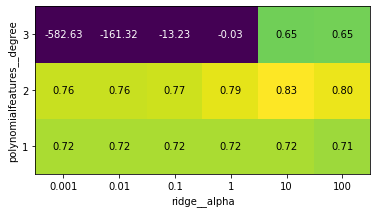

In [41]:
# 交差検証をヒートマップで可視化
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                      xlabel="ridge__alpha", ylabel="polynomialfeatures__degree",
                      xticklabels=param_gird['ridge__alpha'],
                      yticklabels=param_gird['polynomialfeatures__degree'], vmin=0)

In [42]:
print(grid.best_params_)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
